# SMU-MSDS-7333-Quantifying the World

## Case Study 2- Diabetes Patient Hospital Readmittance 

Team Members:
* Rashmi Patel
* Simarpreet Reddy





# Introduction

In this case study, we will build a classifier using logistic regression to predict hospital readmittance for diabetes patients. There is some missing data which will be imputed. We'll discuss variable importances for the target variable-hospital readmittance. We will perform analysis by dividing this case study into 6 parts:

* Business Understanding

* Data Evaluation / Engineering

* Modeling Preparations

* Model Building & Evaluation

* Model Interpretability & Explainability

* Case Conclusions

In [486]:
# Import the required libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#from yellowbrick.regressor import residuals_plot
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [487]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


<ipython-input-487-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [488]:
# This statement enables autocomplete
%config Completer.use_jedi = False

## Business Inderstanding

## Data Evaluation/ Engineering

### Load the data

In [489]:
diabetic_data=pd.read_csv('./dataset_diabetes/diabetic_data.csv')
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Looking at the column information

In [490]:
diabetic_data.info()
print('====================================================')
print('Shape of diabetic_data dataframe:',diabetic_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Looking at the numeric and character variables

#### Numeric Variables

In [491]:
# Checking the number of numeric variables in the dataframe
numerics = ['int16', 'int32', 'int64']
count_num_var=len(diabetic_data.select_dtypes(include=numerics).columns)
print('There are',count_num_var,'numeric variables in the diabetic_data dataframe. The names are given below')
for name in diabetic_data.select_dtypes(include=numerics).columns:
    print(name)


There are 13 numeric variables in the diabetic_data dataframe. The names are given below
encounter_id
patient_nbr
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses


#### Character Variables

In [492]:
# Checking the number of character variables in the dataframe
print('================================================')
character=['object']
count_char_var=len(diabetic_data.select_dtypes(include=character).columns)
print('There are',count_char_var,'charcater variables in the diabetic_data dataframe')

for name in diabetic_data.select_dtypes(include=character).columns:
    print(name)

There are 37 charcater variables in the diabetic_data dataframe
race
gender
age
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


### Looking at the histograms of all numeric variables

array([[<AxesSubplot:title={'center':'encounter_id'}>,
        <AxesSubplot:title={'center':'patient_nbr'}>,
        <AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>],
       [<AxesSubplot:title={'center':'admission_source_id'}>,
        <AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>,
        <AxesSubplot:title={'center':'number_inpatient'}>],
       [<AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

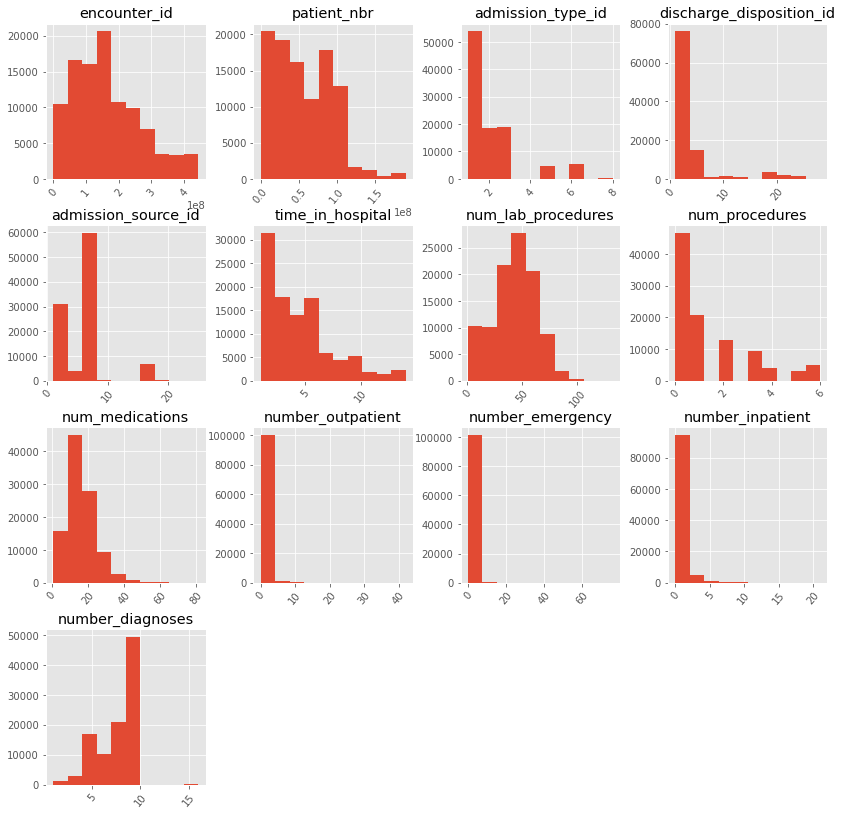

In [493]:
# Since there are 13 numeric variables, we will create a space od 14 by 14 to show histograms of those variables.
diabetic_data.hist(figsize=(14,14), xrot=50)

#### Checking for the missing values


Since in the dataset, the missing values are represented as '?' and not as 'NaN', we will need to have a different approach to work on it.

From the data description found in https://www.hindawi.com/journals/bmri/2014/781670/tab1/, it seems that all the missing values are present in categorical varaibles. There is only 1 numeric/continuous variable named 'weight' which has missing value of approximately 97%. We will be dropping that 'weight' in further steps.

The variables with missing values are as below with their percentage of missing data:

* Race=2.23% 
* Weight=96.85%
* payer_code=39.55%
* medical_specialty=49.08
* diag_1=0.02% (considered 0 in the article mentioned above) 
* diag_2=0.35% (considered 0 in the article mentioned above)
* diag_3=1.39%

In [494]:
Missing_Data= pd.DataFrame()
for col in diabetic_data.columns:
    Missing_Data=Missing_Data.append({"Column Name": col,
                                      "Missing Count":len(diabetic_data[diabetic_data[col] == '?']),
                                      "Missing%":len(diabetic_data[diabetic_data[col] == '?'])/len(diabetic_data)*100 },
                                     ignore_index=True)   
Missing_Data['Missing%'] = Missing_Data['Missing%'].round(decimals = 2)
Missing_Data[Missing_Data["Missing%"] >0]

,Column Name,Missing Count,Missing%
2,race,2273.0,2.23
5,weight,98569.0,96.86
10,payer_code,40256.0,39.56
11,medical_specialty,49949.0,49.08
18,diag_1,21.0,0.02
19,diag_2,358.0,0.35
20,diag_3,1423.0,1.40


#### Dropping unnecessary columns

First of all, the weight column indicates that there is approximately 97% of the values missing in it. Although the weight variable can be an important factor contributing to the model that will be built for the prediction, we will drop the weight variable because it has a lot missing values.


* 'encounter_id'
* 'patient_nbr'
* 'weight'
* 'examide'
* 'citoglipton'

Varibales 'citoglipton' and 'examide' only have 'No' as the value across the dataset, thus, these columns will not add any variance to the classification model. Also, the following variables are just IDs -'encounter_id' and 'patient_nbr' which also won't add any value to the model. 'weight' - The dataset is missing 97% of the data for the column 'Weight'. We will drop this column

In [495]:
drop_col=['weight','examide','citoglipton']
for drop in drop_col:
    print('Unique values in',drop,'are:')
    print(diabetic_data[drop].unique())
   

Unique values in weight are:
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Unique values in examide are:
['No']
Unique values in citoglipton are:
['No']


In [496]:
diabetic_reduced= diabetic_data.drop(columns=['encounter_id','patient_nbr','weight','examide','citoglipton'])
diabetic_reduced.shape
diabetic_reduced.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Dropping rows that we decided to not impute

In [497]:
diabetes_df_reduced_2 = diabetic_reduced.drop(diabetic_reduced[diabetic_reduced["diag_1"]=='?'].index)
diabetes_df_reduced_2 = diabetes_df_reduced_2.drop(diabetes_df_reduced_2[diabetes_df_reduced_2["diag_2"]=='?'].index)
diabetes_df_reduced_2 = diabetes_df_reduced_2.drop(diabetes_df_reduced_2[diabetes_df_reduced_2["diag_3"]=='?'].index)
diabetes_df_reduced_2 = diabetes_df_reduced_2.drop(diabetes_df_reduced_2[diabetes_df_reduced_2["race"]=='?'].index)

#### Again Checking for the missing values in payer_code and Medical Specialty

There is a small decrease in missing values after we dropped unncecessary columns and the rows that was not imputed.

In [498]:

Missing_Data_3= pd.DataFrame()
for col in diabetes_df_reduced_2.columns:
    Missing_Data_3=Missing_Data_3.append({"Column Name": col,"Missing Count":len(diabetes_df_reduced_2[diabetes_df_reduced_2[col] == '?']),"Missing%":len(diabetes_df_reduced_2[diabetes_df_reduced_2[col] == '?'])/len(diabetes_df_reduced_2)*100 }, ignore_index=True)   
Missing_Data_3['Missing%'] = Missing_Data_3['Missing%'].round(decimals = 2)
Missing_Data_3[Missing_Data_3["Missing%"] >0]

,Column Name,Missing Count,Missing%
7,payer_code,38924.0,39.70
8,medical_specialty,48318.0,49.28


In [499]:
diabetes_df_reduced_2.shape

(98053, 45)

#### Imputation of payer_code and medical_specialty

##### Payer-Code

In [500]:
diabetes_df_reduced_2['payer_code'].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP'], dtype=object)

In [501]:
diabetes_df_reduced_2.groupby(['payer_code'])['payer_code'].count()

payer_code
?     38924
BC    4462 
CH    143  
CM    1914 
CP    2431 
DM    523  
HM    6058 
MC    31404
MD    3382 
MP    77   
OG    1013 
OT    94   
PO    582  
SI    52   
SP    4653 
UN    2219 
WC    122  
Name: payer_code, dtype: int64

We see that the major categories in the payer_code are private insurance such as BlueCross, Medicare and Self Pay. We will recategorize the column payer_Code.

###### Recategorize payer_code into payer_code_new

In [502]:
not_private = ['MC','SP','?']
diabetes_df_reduced_2['payer_code'][~diabetes_df_reduced_2['payer_code'].isin(not_private)].unique()

array(['MD', 'HM', 'UN', 'BC', 'CP', 'SI', 'DM', 'CM', 'CH', 'PO', 'WC',
       'OT', 'OG', 'MP'], dtype=object)

In [503]:
payer_code_values = [
    (diabetes_df_reduced_2['payer_code'] == "SP") ,
    (diabetes_df_reduced_2['payer_code'] == "MC") ,
    (diabetes_df_reduced_2['payer_code'] == "?"),
    #(cs2_raw_data_reduced['payer_code'][~cs2_raw_data_reduced['payer_code'].isin(not_private)])
   (~diabetes_df_reduced_2['payer_code'].isin(not_private))
    ]
#new transmission categories
t_values_types = ['Self_Pay', 'Medicare', '?','Private']
#t_values_types = ['Self_Pay', 'Medicare', 'Missing']
#new transmission column
diabetes_df_reduced_2['payer_code_new'] = np.select(payer_code_values, t_values_types)
diabetes_df_reduced_2['payer_code_new'].unique()

array(['?', 'Medicare', 'Private', 'Self_Pay'], dtype=object)

In [504]:
#Distribution of payer_code
diabetes_df_reduced_2.groupby(['payer_code'])['payer_code'].count()

payer_code
?     38924
BC    4462 
CH    143  
CM    1914 
CP    2431 
DM    523  
HM    6058 
MC    31404
MD    3382 
MP    77   
OG    1013 
OT    94   
PO    582  
SI    52   
SP    4653 
UN    2219 
WC    122  
Name: payer_code, dtype: int64

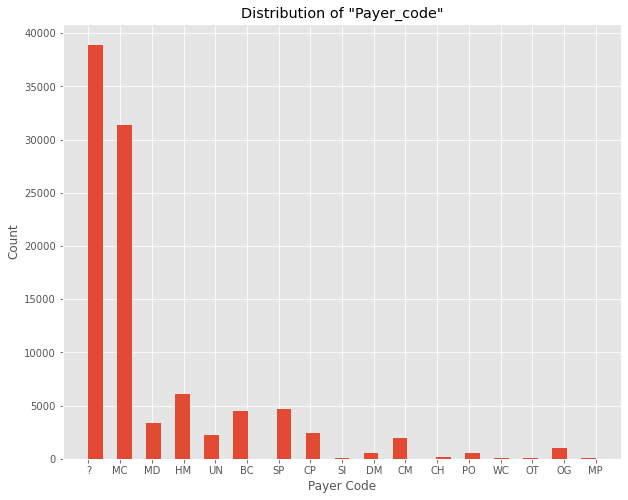

In [505]:
plt.figure(figsize=(10,8))
plt.hist(diabetes_df_reduced_2['payer_code'], bins=35)
plt.title('Distribution of "Payer_code"')
plt.xlabel("Payer Code")
plt.ylabel("Count")
plt.show()

In [506]:
#Distribution of Re-categorize data
diabetes_df_reduced_2.groupby(['payer_code_new','payer_code'])['payer_code_new'].count()

payer_code_new  payer_code
?               ?             38924
Medicare        MC            31404
Private         BC            4462 
                CH            143  
                CM            1914 
                CP            2431 
                DM            523  
                HM            6058 
                MD            3382 
                MP            77   
                OG            1013 
                OT            94   
                PO            582  
                SI            52   
                UN            2219 
                WC            122  
Self_Pay        SP            4653 
Name: payer_code_new, dtype: int64

age might be a good factor to consider to impute payer_code missing values. Let's analyse the column 'age'¶


##### Age

In [507]:
diabetes_df_reduced_2['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [508]:
diabetes_df_reduced_2.groupby(['age'])['age'].count()

age
[0-10)      65   
[10-20)     466  
[20-30)     1478 
[30-40)     3548 
[40-50)     9265 
[50-60)     16697
[60-70)     21809
[70-80)     25306
[80-90)     16702
[90-100)    2717 
Name: age, dtype: int64

###### Recategorize Age

In [509]:
age_values = [
    (diabetes_df_reduced_2['age'] == "[0-10)") | (diabetes_df_reduced_2['age'] == "[10-20)") ,
    (diabetes_df_reduced_2['age'] == "[20-30)") | (diabetes_df_reduced_2['age'] == "[30-40)") ,
    (diabetes_df_reduced_2['age'] == "[40-50)") | (diabetes_df_reduced_2['age'] == "[50-60)"),
    (diabetes_df_reduced_2['age'] == "[60-70)") ,
    (diabetes_df_reduced_2['age'] == "[70-80)") | (diabetes_df_reduced_2['age'] == "[80-90)") | (diabetes_df_reduced_2['age'] == "[90-100)") ,
    ]
#new transmission categories
age_values_types = ['0-20','20-40','40-60','60-70','>70']
#t_values_types = ['Self_Pay', 'Medicare', 'Missing']
#new transmission column
diabetes_df_reduced_2['age_new'] = np.select(age_values, age_values_types)
diabetes_df_reduced_2['age_new'].unique()

array(['0-20', '20-40', '40-60', '60-70', '>70'], dtype=object)

In [510]:
diabetes_df_reduced_2.groupby(['age_new','age'])['age_new'].count()

age_new  age     
0-20     [0-10)      65   
         [10-20)     466  
20-40    [20-30)     1478 
         [30-40)     3548 
40-60    [40-50)     9265 
         [50-60)     16697
60-70    [60-70)     21809
>70      [70-80)     25306
         [80-90)     16702
         [90-100)    2717 
Name: age_new, dtype: int64

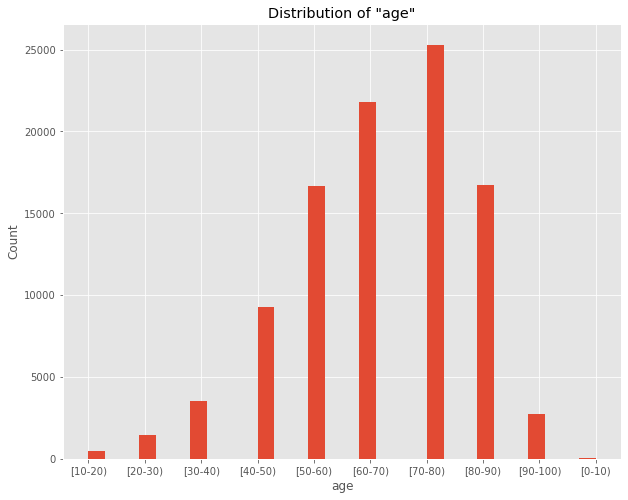

In [511]:
plt.figure(figsize=(10,8))
plt.hist(diabetes_df_reduced_2['age'],bins=30)
plt.title('Distribution of "age"')
plt.xlabel("age")
plt.ylabel("Count")
plt.show()

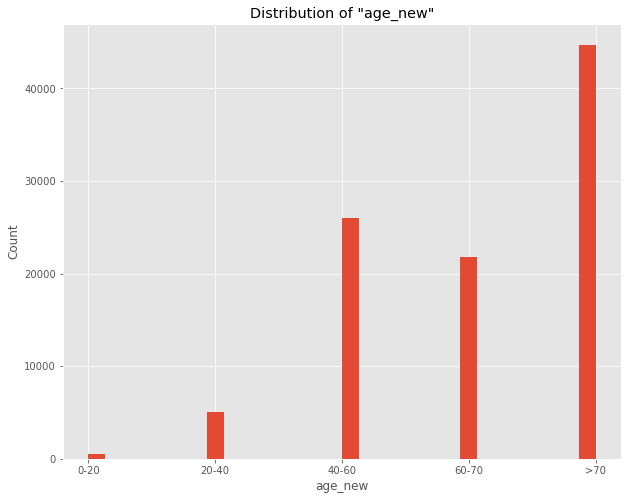

In [512]:
plt.figure(figsize=(10,8))
plt.hist(diabetes_df_reduced_2['age_new'],bins=30)
plt.title('Distribution of "age_new"')
plt.xlabel("age_new")
plt.ylabel("Count")
plt.show()

###### Analyze 'age_new' and 'payer_code_new'

In [513]:
diabetes_df_reduced_2.groupby(['age_new','payer_code_new'])['payer_code_new'].count()

age_new  payer_code_new
0-20     ?                 349  
         Private           158  
         Self_Pay          24   
20-40    ?                 2117 
         Medicare          332  
         Private           2206 
         Self_Pay          371  
40-60    ?                 11073
         Medicare          3030 
         Private           10135
         Self_Pay          1724 
60-70    ?                 8689 
         Medicare          6256 
         Private           5823 
         Self_Pay          1041 
>70      ?                 16696
         Medicare          21786
         Private           4750 
         Self_Pay          1493 
Name: payer_code_new, dtype: int64

We will fill the missing values in the 'payer_code_new' with the most popular 'payer_code' in each age category

###### payer_code_new before data imputation

In [514]:
diabetes_df_reduced_2.groupby(['payer_code_new'])['payer_code_new'].count()

payer_code_new
?           38924
Medicare    31404
Private     23072
Self_Pay    4653 
Name: payer_code_new, dtype: int64

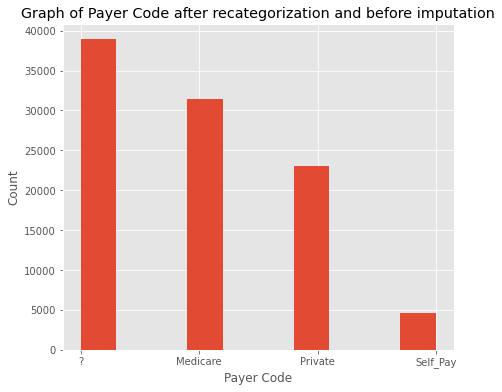

In [515]:
plt.figure(figsize=(7,6))
plt.hist(diabetes_df_reduced_2['payer_code_new'])
plt.title('Graph of Payer Code after recategorization and before imputation')
plt.xlabel("Payer Code")
plt.ylabel("Count")
plt.show()

In [516]:
#Fill missing values of payer_code_new based on age_new
diabetes_df_reduced_2.loc[(diabetes_df_reduced_2['payer_code_new']=='?') & (diabetes_df_reduced_2['age_new']=='0-20'),'payer_code_new'] = 'Private'
diabetes_df_reduced_2.loc[(diabetes_df_reduced_2['payer_code_new']=='?') & (diabetes_df_reduced_2['age_new']=='20-40'),'payer_code_new'] = 'Private'
diabetes_df_reduced_2.loc[(diabetes_df_reduced_2['payer_code_new']=='?') & (diabetes_df_reduced_2['age_new']=='40-60'),'payer_code_new'] = 'Private'
diabetes_df_reduced_2.loc[(diabetes_df_reduced_2['payer_code_new']=='?') & (diabetes_df_reduced_2['age_new']=='60-70'),'payer_code_new'] = 'Medicare'
diabetes_df_reduced_2.loc[(diabetes_df_reduced_2['payer_code_new']=='?') & (diabetes_df_reduced_2['age_new']=='>70'),'payer_code_new'] = 'Medicare'

In [517]:
diabetes_df_reduced_2.groupby(['age_new','payer_code_new'])['payer_code_new'].count()

age_new  payer_code_new
0-20     Private           507  
         Self_Pay          24   
20-40    Medicare          332  
         Private           4323 
         Self_Pay          371  
40-60    Medicare          3030 
         Private           21208
         Self_Pay          1724 
60-70    Medicare          14945
         Private           5823 
         Self_Pay          1041 
>70      Medicare          38482
         Private           4750 
         Self_Pay          1493 
Name: payer_code_new, dtype: int64

###### payer_code_new after data imputation

In [518]:
diabetes_df_reduced_2.groupby(['payer_code_new'])['payer_code_new'].count()

payer_code_new
Medicare    56789
Private     36611
Self_Pay    4653 
Name: payer_code_new, dtype: int64

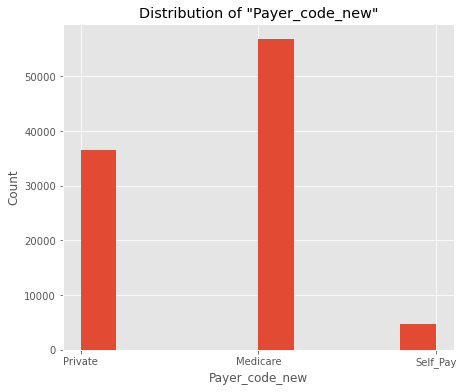

In [519]:
plt.figure(figsize=(7,6))
plt.hist(diabetes_df_reduced_2['payer_code_new'])
plt.title('Distribution of "Payer_code_new"')
plt.xlabel("Payer_code_new")
plt.ylabel("Count")
plt.show()

As we now have payer_code_new, we will drop payer_code column from the data set.

In [520]:
diabetes_df_reduced_3= diabetes_df_reduced_2.drop(columns=['payer_code'])
diabetes_df_reduced_3.shape

(98053, 46)

##### medical_specialty

In [521]:
diabetes_df_reduced_3.groupby(['medical_specialty'])['medical_specialty'].count()

medical_specialty
?                                       48318
AllergyandImmunology                    7    
Anesthesiology                          11   
Anesthesiology-Pediatric                12   
Cardiology                              5218 
Cardiology-Pediatric                    5    
DCPTEAM                                 6    
Dentistry                               4    
Dermatology                             1    
Emergency/Trauma                        7472 
Endocrinology                           114  
Endocrinology-Metabolism                8    
Family/GeneralPractice                  7140 
Gastroenterology                        556  
Gynecology                              53   
Hematology                              82   
Hematology/Oncology                     199  
Hospitalist                             55   
InfectiousDiseases                      34   
InternalMedicine                        13967
Nephrology                              1581 
Neurology       

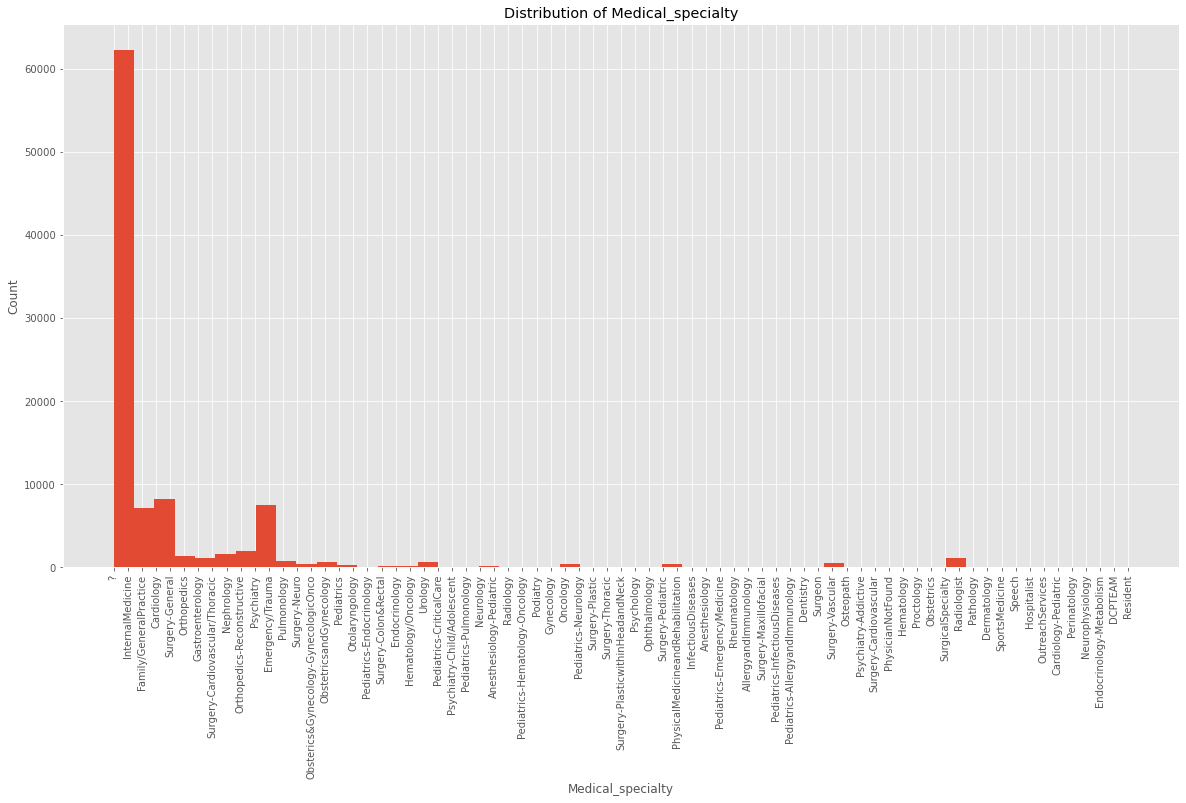

In [522]:
plt.figure(figsize=(20,10))
plt.hist(diabetes_df_reduced_3['medical_specialty'],bins=50)
plt.title('Distribution of Medical_specialty')
plt.xticks(rotation=90)
plt.xlabel("Medical_specialty")
plt.ylabel("Count")
plt.show()

###### Recategorize medical_speciality

In [523]:
pediatrics = "Pediat" #Anesthesiology-Pediatric and Cardiology-Pediatric
ms_ped =  diabetes_df_reduced_3["medical_specialty"].str.contains(pediatrics, na = False)

surgery ="Surg"
ms_surgery = diabetes_df_reduced_3["medical_specialty"].str.contains(surgery, na = False)


Obstet = "Obstet"
Gynec = "Gynec"
ms_obst_Gynec =  diabetes_df_reduced_3["medical_specialty"].str.contains(Obstet, na = False) | diabetes_df_reduced_3["medical_specialty"].str.contains(Gynec, na = False) 

cardio = "Cardio"
ms_cardio =  diabetes_df_reduced_3["medical_specialty"].str.contains(cardio, na = False)


Psych ="Psychiatry"
ms_Psych =  diabetes_df_reduced_3["medical_specialty"].str.contains(Psych, na = False)

Radio = "Radio"
ms_Radio =  diabetes_df_reduced_3["medical_specialty"].str.contains(Radio, na = False)

Ortho = "Ortho"
ms_Ortho =  diabetes_df_reduced_3["medical_specialty"].str.contains(Ortho, na = False)

Neuro = "Neuro"
ms_Neuro =  diabetes_df_reduced_3["medical_specialty"].str.contains(Neuro, na = False)

Onco = "Onco"
Hema = "Hema"
ms_Onco_Hema =  diabetes_df_reduced_3["medical_specialty"].str.contains(Onco, na = False) | diabetes_df_reduced_3["medical_specialty"].str.contains(Hema, na = False) 

Hospital_Staff = ('DCPTEAM','Hospitalist','medical_specialty','OutreachServices','PhysicianNotFound','Resident')

In [524]:
#Group different  categories

ms_values = [
    (diabetes_df_reduced_3["medical_specialty"].str.contains(pediatrics, na = False)) ,
    (diabetes_df_reduced_3["medical_specialty"].str.contains(surgery, na = False)),
    (diabetes_df_reduced_3["medical_specialty"].str.contains(Obstet, na = False)) | (diabetes_df_reduced_3["medical_specialty"].str.contains(Gynec, na = False)),
    (diabetes_df_reduced_3["medical_specialty"].str.contains(cardio, na = False)),
   (diabetes_df_reduced_3["medical_specialty"].str.contains(Psych, na = False)),
     (diabetes_df_reduced_3["medical_specialty"].str.contains(Radio, na = False)),
     (diabetes_df_reduced_3["medical_specialty"].str.contains(Ortho, na = False)),
     (diabetes_df_reduced_3["medical_specialty"].str.contains(Neuro, na = False)),
     ( diabetes_df_reduced_3["medical_specialty"].str.contains(Onco, na = False) | diabetes_df_reduced_3["medical_specialty"].str.contains(Hema, na = False) )
    ]
#new transmission categories
ms_values_types = ['Pediatrics', 'Surgery', 'Obstet/Gynec','Cardiologist','Psychology','Radiologist', 'Orthopedics', 'Neurologist', 'Hematology/Oncology' ]
#t_values_types = ['Self_Pay', 'Medicare', 'Missing']
#new transmission column
diabetes_df_reduced_3['medical_specialty_new'] = np.select(ms_values, ms_values_types)
diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty'].isin(Hospital_Staff)] ='Hospital Staff'
diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty']=='InternalMedicine'] = 'InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty']=='Family/GeneralPractice'] = 'Family/GeneralPractice'
diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty']=='Emergency/Trauma'] = 'Emergency/Trauma'
diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty']=='?'] = '?'

diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty_new']=='0'] = 'Others'
diabetes_df_reduced_3.groupby(['medical_specialty_new'])['medical_specialty_new'].count()
#diabetes_df_reduced_3['medical_specialty_new'].unique()

<ipython-input-524-5549bee2c3d0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty'].isin(Hospital_Staff)] ='Hospital Staff'
<ipython-input-524-5549bee2c3d0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df_reduced_3['medical_specialty_new'][diabetes_df_reduced_3['medical_specialty']=='InternalMedicine'] = 'InternalMedicine'
<ipython-input-524-5549bee2c3d0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

medical_specialty_new
?                         48318
Cardiologist              5218 
Emergency/Trauma          7472 
Family/GeneralPractice    7140 
Hematology/Oncology       625  
Hospital Staff            85   
InternalMedicine          13967
Neurologist               197  
Obstet/Gynec              730  
Orthopedics               2505 
Others                    4569 
Pediatrics                351  
Psychology                828  
Radiologist               1163 
Surgery                   4885 
Name: medical_specialty_new, dtype: int64

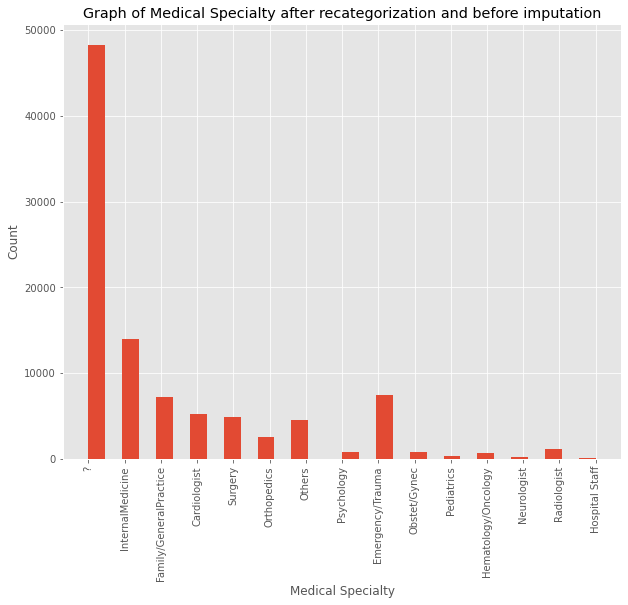

In [525]:
plt.figure(figsize=(10,8))
plt.hist(diabetes_df_reduced_3['medical_specialty_new'],bins=30)
plt.title('Graph of Medical Specialty after recategorization and before imputation')
plt.xticks(rotation=90)
plt.xlabel("Medical Specialty")
plt.ylabel("Count")
plt.show()

###### After recategorization


In [526]:
diabetes_df_reduced_3.groupby(['medical_specialty_new','medical_specialty'])['medical_specialty_new'].count()

medical_specialty_new   medical_specialty                   
?                       ?                                       48318
Cardiologist            Cardiology                              5218 
Emergency/Trauma        Emergency/Trauma                        7472 
Family/GeneralPractice  Family/GeneralPractice                  7140 
Hematology/Oncology     Hematology                              82   
                        Hematology/Oncology                     199  
                        Oncology                                344  
Hospital Staff          DCPTEAM                                 6    
                        Hospitalist                             55   
                        OutreachServices                        12   
                        PhysicianNotFound                       10   
                        Resident                                2    
InternalMedicine        InternalMedicine                        13967
Neurologist             Neuro

In [527]:
diabetes_df_reduced_3.groupby(['medical_specialty_new'])['medical_specialty_new'].count()

medical_specialty_new
?                         48318
Cardiologist              5218 
Emergency/Trauma          7472 
Family/GeneralPractice    7140 
Hematology/Oncology       625  
Hospital Staff            85   
InternalMedicine          13967
Neurologist               197  
Obstet/Gynec              730  
Orthopedics               2505 
Others                    4569 
Pediatrics                351  
Psychology                828  
Radiologist               1163 
Surgery                   4885 
Name: medical_specialty_new, dtype: int64

##### Analyze 'age_new' in relation to 'medical_speciality_new'

In [528]:
diabetes_df_reduced_3.groupby(['medical_specialty_new','age_new'])['medical_specialty_new'].count()

medical_specialty_new   age_new
?                       0-20       194  
                        20-40      2305 
                        40-60      12284
                        60-70      10796
                        >70        22739
Cardiologist            0-20       1    
                        20-40      81   
                        40-60      1512 
                        60-70      1448 
                        >70        2176 
Emergency/Trauma        0-20       22   
                        20-40      371  
                        40-60      1938 
                        60-70      1488 
                        >70        3653 
Family/GeneralPractice  0-20       21   
                        20-40      404  
                        40-60      2054 
                        60-70      1399 
                        >70        3262 
Hematology/Oncology     0-20       2    
                        20-40      6    
                        40-60      147  
                        6

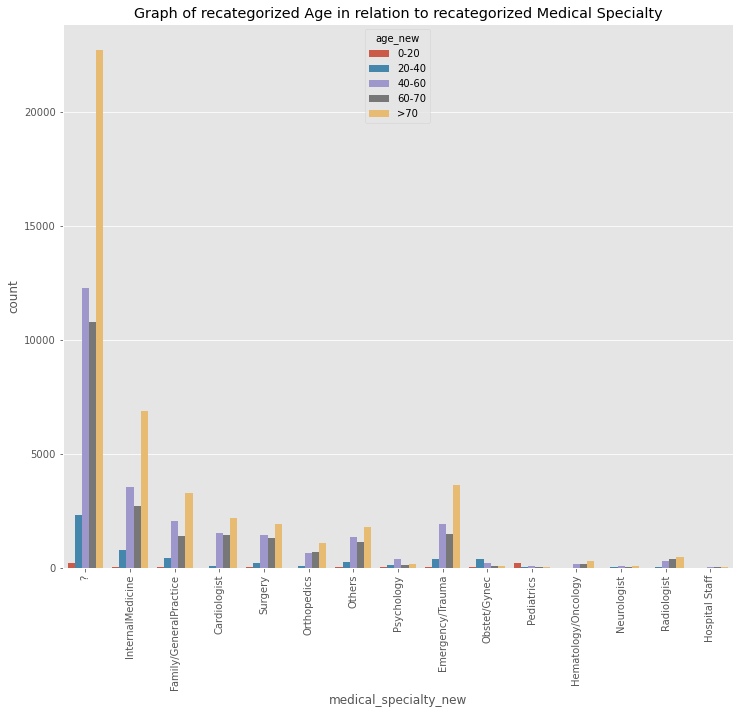

In [529]:
plt.figure(figsize=(12,10))
x=sns.countplot(x ='medical_specialty_new', hue = "age_new", data = diabetes_df_reduced_3)
x.set_xticklabels(x.get_xticklabels(),rotation=90)
x.set(title='Graph of recategorized Age in relation to recategorized Medical Specialty')
plt.show()

In [530]:
diabetes_df_reduced_3.groupby(['age_new','medical_specialty_new'])['medical_specialty_new'].count()

age_new  medical_specialty_new 
0-20     ?                         194  
         Cardiologist              1    
         Emergency/Trauma          22   
         Family/GeneralPractice    21   
         Hematology/Oncology       2    
         InternalMedicine          30   
         Obstet/Gynec              13   
         Others                    13   
         Pediatrics                206  
         Psychology                16   
         Radiologist               1    
         Surgery                   12   
20-40    ?                         2305 
         Cardiologist              81   
         Emergency/Trauma          371  
         Family/GeneralPractice    404  
         Hematology/Oncology       6    
         Hospital Staff            7    
         InternalMedicine          789  
         Neurologist               9    
         Obstet/Gynec              381  
         Orthopedics               58   
         Others                    255  
         Pediatrics      

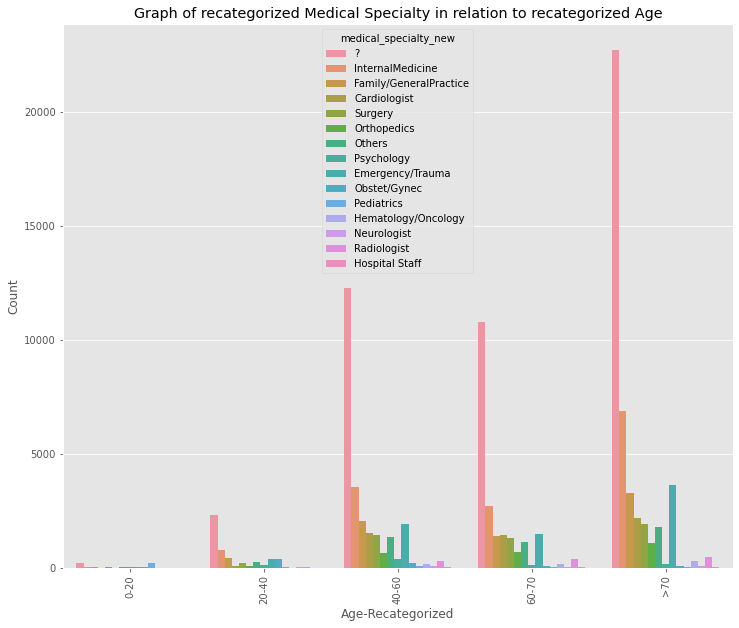

In [531]:
plt.figure(figsize=(12,10))
x=sns.countplot(hue ='medical_specialty_new', x = "age_new", data = diabetes_df_reduced_3)
x.set_xticklabels(x.get_xticklabels(),rotation=90)
x.set(title='Graph of recategorized Medical Specialty in relation to recategorized Age',
     xlabel='Age-Recategorized', ylabel='Count')
plt.show()

In [532]:
diabetes_df_reduced_3.groupby(['admission_type_id','medical_specialty_new'])['medical_specialty_new'].count()

admission_type_id  medical_specialty_new 
1                  ?                         32293
                   Cardiologist              1599 
                   Emergency/Trauma          2414 
                   Family/GeneralPractice    3336 
                   Hematology/Oncology       134  
                   Hospital Staff            18   
                   InternalMedicine          9205 
                   Neurologist               36   
                   Obstet/Gynec              26   
                   Orthopedics               253  
                   Others                    1498 
                   Pediatrics                220  
                   Psychology                332  
                   Radiologist               126  
                   Surgery                   688  
2                  ?                         5244 
                   Cardiologist              968  
                   Emergency/Trauma          4164 
                   Family/GeneralPractic

##### Analyse 'admission_id' with respect to age_new and medical speciality_new

In [533]:
diabetes_df_reduced_3.groupby(['age_new','admission_type_id','medical_specialty_new'])['medical_specialty_new'].count()

age_new  admission_type_id  medical_specialty_new 
0-20     1                  ?                         166  
                            Cardiologist              1    
                            Emergency/Trauma          17   
                            Family/GeneralPractice    8    
                            InternalMedicine          21   
                            Others                    6    
                            Pediatrics                112  
                            Psychology                8    
                            Surgery                   5    
         2                  ?                         12   
                            Emergency/Trauma          4    
                            Family/GeneralPractice    2    
                            Hematology/Oncology       2    
                            InternalMedicine          3    
                            Obstet/Gynec              2    
                            Others               

In [534]:
diabetes_df_reduced_3.groupby(['age_new','medical_specialty_new'])['medical_specialty_new'].count()

age_new  medical_specialty_new 
0-20     ?                         194  
         Cardiologist              1    
         Emergency/Trauma          22   
         Family/GeneralPractice    21   
         Hematology/Oncology       2    
         InternalMedicine          30   
         Obstet/Gynec              13   
         Others                    13   
         Pediatrics                206  
         Psychology                16   
         Radiologist               1    
         Surgery                   12   
20-40    ?                         2305 
         Cardiologist              81   
         Emergency/Trauma          371  
         Family/GeneralPractice    404  
         Hematology/Oncology       6    
         Hospital Staff            7    
         InternalMedicine          789  
         Neurologist               9    
         Obstet/Gynec              381  
         Orthopedics               58   
         Others                    255  
         Pediatrics      

##### 'medical_speciality' for age groups '0-20', '20-40' and '40-60'

We see that 'admission_id' does not add much variance to mdeical_speciality for the below listed age groups, thus we will impute the most popular medical_speciality for the following age groups '0-20', '20-40' and '40-60'

In [535]:
diabetes_df_reduced_3.loc[(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='0-20'), 'medical_specialty_new'] ='Pediatrics'
diabetes_df_reduced_3.loc[(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='20-40'), 'medical_specialty_new'] ='InternalMedicine'
diabetes_df_reduced_3.loc[(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='40-60'), 'medical_specialty_new'] ='InternalMedicine'


In [536]:
diabetes_df_reduced_3.groupby(['age_new','medical_specialty_new'])['medical_specialty_new'].count()

age_new  medical_specialty_new 
0-20     Cardiologist              1    
         Emergency/Trauma          22   
         Family/GeneralPractice    21   
         Hematology/Oncology       2    
         InternalMedicine          30   
         Obstet/Gynec              13   
         Others                    13   
         Pediatrics                400  
         Psychology                16   
         Radiologist               1    
         Surgery                   12   
20-40    Cardiologist              81   
         Emergency/Trauma          371  
         Family/GeneralPractice    404  
         Hematology/Oncology       6    
         Hospital Staff            7    
         InternalMedicine          3094 
         Neurologist               9    
         Obstet/Gynec              381  
         Orthopedics               58   
         Others                    255  
         Pediatrics                13   
         Psychology                116  
         Radiologist     

##### 'medical_speciality' for age groups 60-70 and >70

We will impute medical_speciality for the age_group 60-70 and >70 using admission id. We will assign the most common medical_speciality in each age_group and admission_id combination.

In [537]:
diabetes_df_reduced_3.groupby(['medical_specialty_new'])['medical_specialty_new'].count()

medical_specialty_new
?                         33535
Cardiologist              5218 
Emergency/Trauma          7472 
Family/GeneralPractice    7140 
Hematology/Oncology       625  
Hospital Staff            85   
InternalMedicine          28556
Neurologist               197  
Obstet/Gynec              730  
Orthopedics               2505 
Others                    4569 
Pediatrics                545  
Psychology                828  
Radiologist               1163 
Surgery                   4885 
Name: medical_specialty_new, dtype: int64

In [538]:
grp3 = ['age_new','admission_type_id','medical_specialty_new']
cs3 = diabetes_df_reduced_3.loc[(diabetes_df_reduced_3['age_new'] =='60-70') | (diabetes_df_reduced_3['age_new'] =='>70'),]
cs3.shape
#cs3.groupby(by='age_new','medical_specialty_new')['medical_specialty_new'].count()
#counts_ms_age2 = pd.DataFrame(cs2_raw_data_reduced[cs2_raw_data_reduced['age_new'] =='40-60'].groupby(by = grp2)['medical_specialty_new']. count())
#counts_ms_age2

counts_cs3 = pd.DataFrame(cs3.groupby(by = grp3)['medical_specialty_new']. count())
counts_cs3

medical_specialty_new
age_new admission_type_id medical_specialty_new                        
60-70   1                 ?                       6952                 
                          Cardiologist            401                  
                          Emergency/Trauma        513                  
                          Family/GeneralPractice  627                  
                          Hematology/Oncology     31                   
                          Hospital Staff          4                    
                          InternalMedicine        1705                 
                          Neurologist             6                    
                          Obstet/Gynec            1                    
                          Orthopedics             49                   
                          Others                  348                  
                          Pediatrics              15                   
                          Psychology              37                   
                          Radiologist             30                   
                          Surgery                 145                  
        2                 ?                       1293                 
                          Cardiologist            284                  
                          Emergency/Trauma        815                  
                          Family/GeneralPractice  256                  
                          Hematology/Oncology     77                   
                          Hospital Staff          1                    
                          InternalMedicine        505                  
                          Neurologist             11                   
                          Obstet/Gynec            8                    
                          Orthopedics             49                   
                          Others                  275                  
                          Pediatrics              4                    
                          Psychology              47                   
                          Radiologist             85                   
                          Surgery                 341                  
        3                 ?                       1759                 
                          Cardiologist            476                  
                          Emergency/Trauma        159                  
                          Family/GeneralPractice  248                  
                          Hematology/Oncology     53                   
                          Hospital Staff          17                   
                          InternalMedicine        201                  
                          Neurologist             30                   
                          Obstet/Gynec            31                   
                          Orthopedics             502                  
                          Others                  416                  
                          Pediatrics              3                    
                          Psychology              26                   
                          Radiologist             255                  
                          Surgery                 645                  
        4                 ?                       2                    
                          InternalMedicine        1                    
        5                 ?                       517                  
                          Cardiologist            32                   
                          Family/GeneralPractice  130                  
                          Hematology/Oncology     16                   
                          InternalMedicine        10                   
                          Obstet/Gynec            5                    
                          Orthopedics             36                   
                  

##### 'medical_speciality' before final imputation

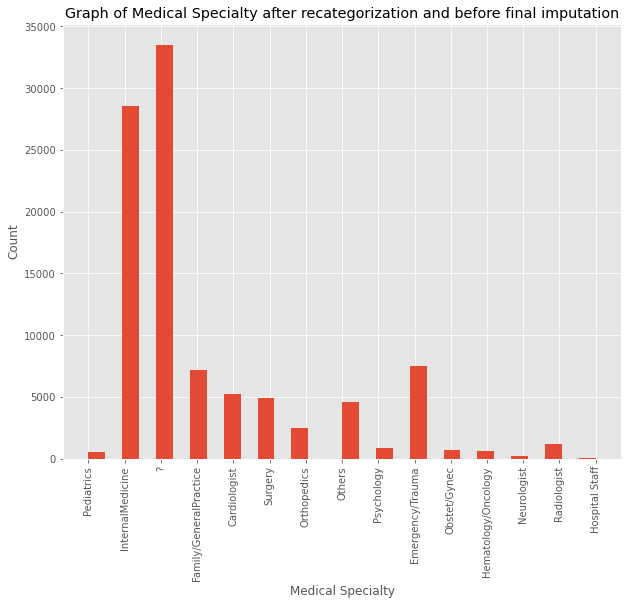

In [539]:
plt.figure(figsize=(10,8))
plt.hist(diabetes_df_reduced_3['medical_specialty_new'],bins=30)
plt.title('Graph of Medical Specialty after recategorization and before final imputation')
plt.xticks(rotation=90)
plt.xlabel("Medical Specialty")
plt.ylabel("Count")
plt.show()

In [540]:
diabetes_df_reduced_3.groupby(['medical_specialty_new'])['medical_specialty_new'].count()

medical_specialty_new
?                         33535
Cardiologist              5218 
Emergency/Trauma          7472 
Family/GeneralPractice    7140 
Hematology/Oncology       625  
Hospital Staff            85   
InternalMedicine          28556
Neurologist               197  
Obstet/Gynec              730  
Orthopedics               2505 
Others                    4569 
Pediatrics                545  
Psychology                828  
Radiologist               1163 
Surgery                   4885 
Name: medical_specialty_new, dtype: int64

In [541]:
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==1)] = 'InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==2)] = 'Emergency/Trauma'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==3)] = 'Surgery'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==4)] = 'InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==5)] = 'Family/GeneralPractice'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==6)] = 'InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==7)] = 'Emergency/Trauma'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==8)] ='InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==1)] ='InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==2)] ='Emergency/Trauma'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==3)] ='Family/GeneralPractice'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==4)] ='InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==5)] ='Family/GeneralPractice'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==6)] ='InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==7)] ='InternalMedicine'
diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='>70') & (diabetes_df_reduced_3['admission_type_id'] ==8)] ='Surgery'



<ipython-input-541-d0b654ad2331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==1)] = 'InternalMedicine'
<ipython-input-541-d0b654ad2331>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df_reduced_3['medical_specialty_new'][(diabetes_df_reduced_3['medical_specialty_new'] =='?') & (diabetes_df_reduced_3['age_new'] =='60-70') & (diabetes_df_reduced_3['admission_type_id'] ==2)] = 'Emergency/Trauma'
<ipython-input-541

In [542]:
diabetes_df_reduced_3.groupby(['medical_specialty_new'])['medical_specialty_new'].count()

medical_specialty_new
Cardiologist              5218 
Emergency/Trauma          11037
Family/GeneralPractice    11943
Hematology/Oncology       625  
Hospital Staff            85   
InternalMedicine          51957
Neurologist               197  
Obstet/Gynec              730  
Orthopedics               2505 
Others                    4569 
Pediatrics                545  
Psychology                828  
Radiologist               1163 
Surgery                   6651 
Name: medical_specialty_new, dtype: int64

In [543]:
diabetes_df_reduced_4= diabetes_df_reduced_3.drop(columns=['medical_specialty'])
diabetes_df_reduced_4.shape

(98053, 46)

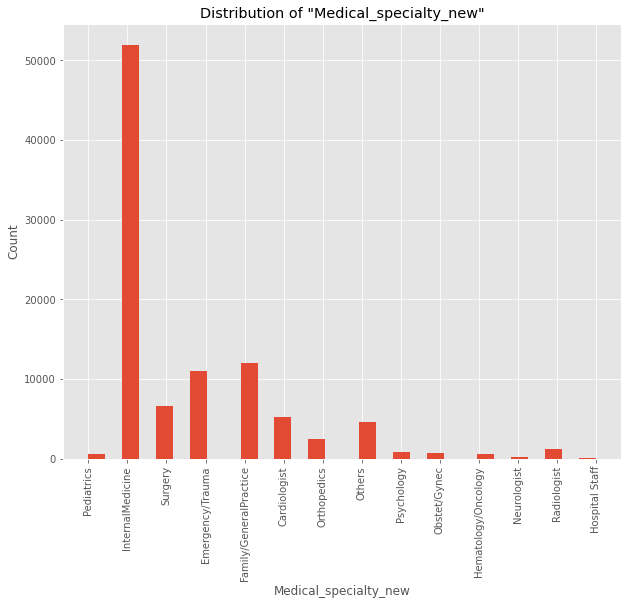

In [544]:
plt.figure(figsize=(10,8))
plt.hist(diabetes_df_reduced_4['medical_specialty_new'],bins=30)
plt.title('Distribution of "Medical_specialty_new"')
plt.xticks(rotation=90)
plt.xlabel("Medical_specialty_new")
plt.ylabel("Count")
plt.show()

##### Final check on missing values

In [545]:
Missing_Data_4= pd.DataFrame()
for col in diabetes_df_reduced_4.columns:
    Missing_Data_4=Missing_Data_4.append({"Column Name": col,"Missing Count":len(diabetes_df_reduced_4[diabetes_df_reduced_4[col] == '?']),"Missing%":len(diabetes_df_reduced_4[diabetes_df_reduced_4[col] == '?'])/len(diabetes_df_reduced_4)*100 }, ignore_index=True)   
Missing_Data_4['Missing%'] = Missing_Data_4['Missing%'].round(decimals = 2)
Missing_Data_4[Missing_Data_4["Missing%"] >0]

,Column Name,Missing Count,Missing%


In [546]:
diabetes_df_reduced_4['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

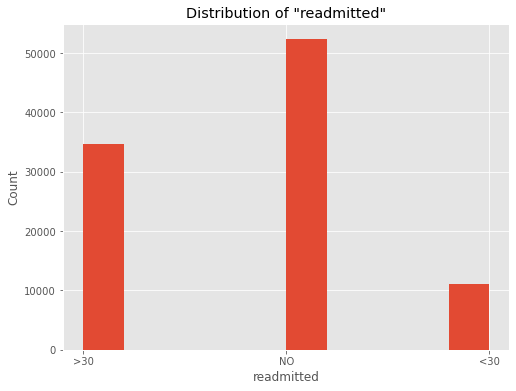

In [547]:
plt.figure(figsize=(8,6))
plt.hist(diabetes_df_reduced_4['readmitted'],align='mid')
plt.title('Distribution of "readmitted"')
plt.xlabel("readmitted")
plt.ylabel("Count")
plt.show()

##### Categorize Diagnosis Codes into Clinical Groups

We decided to categorize the diagnosis codes into clinical groups, according to the following paper.

https://www.hindawi.com/journals/bmri/2014/781670/tab2/

In [548]:
# Function to Categorize DX based on URL ...
def diag_code(code):
    try:
        code = float(code)
    except:
        code = 0

    # Circulatory
    if code in range(390,460) or code == 785:
        return("Circulatory")

    # Respiratory
    elif code in range(460,520) or code == 786:
        return("Respiratory")

    # Digestive
    elif code in range(520,580) or code == 787:
        return("Digestive")

    # Diabetes
    elif code >= 250 and code < 251:
        return("Diabetes")

    # Injury
    elif code in range(800,1000):
        return("Injury")

    # Musculoskeletal
    elif code in range(710,740):
        return("Musculoskeletal")

    # Genitourinary
    elif code in range(580,630) or code == 788:
        return("Genitourinary")

    # Neoplasms
    elif code in range(140,240):
        return("Neoplasms")
    elif code in range(780,783) or code == 784:
        return("Neoplasms")
    elif code in range(790,800):
        return("Neoplasms")
    elif code in range(240,250):
        return("Neoplasms")
    elif code in range(251,280):
        return("Neoplasms")
    elif code in range(680,710):
        return("Neoplasms")
    elif code in range(1,140):
        return("Neoplasms")
    elif code in range(290,320):
        return("Neoplasms")

    # Other
    else:
        return("Other")


In [549]:
diabetes_df_reduced_4["Diag1_new"] = diabetes_df_reduced_4["diag_1"].apply(diag_code)
diabetes_df_reduced_4["Diag2_new"] = diabetes_df_reduced_4["diag_2"].apply(diag_code)
diabetes_df_reduced_4["Diag3_new"] = diabetes_df_reduced_4["diag_3"].apply(diag_code)


print(diabetes_df_reduced_4["Diag1_new"].value_counts())
print("")
print(diabetes_df_reduced_4["Diag2_new"].value_counts())
print("")
print(diabetes_df_reduced_4["Diag3_new"].value_counts())

Circulatory        29630
Neoplasms          15734
Respiratory        13993
Digestive          9187 
Diabetes           7965 
Injury             6703 
Other              5119 
Genitourinary      4983 
Musculoskeletal    4739 
Name: Diag1_new, dtype: int64

Circulatory        31104
Neoplasms          20751
Diabetes           11862
Respiratory        10637
Genitourinary      8203 
Other              7409 
Digestive          4049 
Injury             2328 
Musculoskeletal    1710 
Name: Diag2_new, dtype: int64

Circulatory        29632
Neoplasms          20542
Diabetes           16695
Other              9854 
Respiratory        7199 
Genitourinary      6527 
Digestive          3852 
Injury             1890 
Musculoskeletal    1862 
Name: Diag3_new, dtype: int64


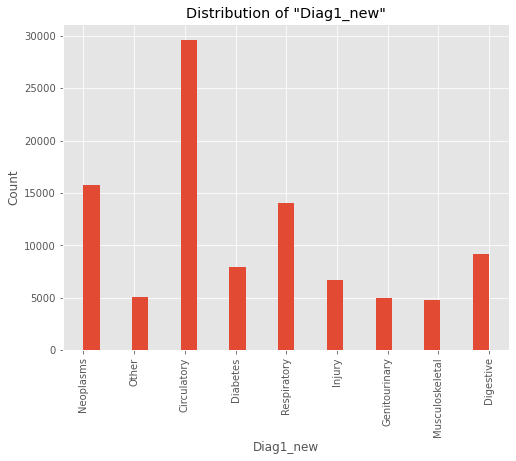

In [550]:
plt.figure(figsize=(8,6))
plt.hist(diabetes_df_reduced_4["Diag1_new"],bins=25)
plt.xticks(rotation=90)
plt.title('Distribution of "Diag1_new"')
plt.xlabel("Diag1_new")
plt.ylabel("Count")
plt.show()

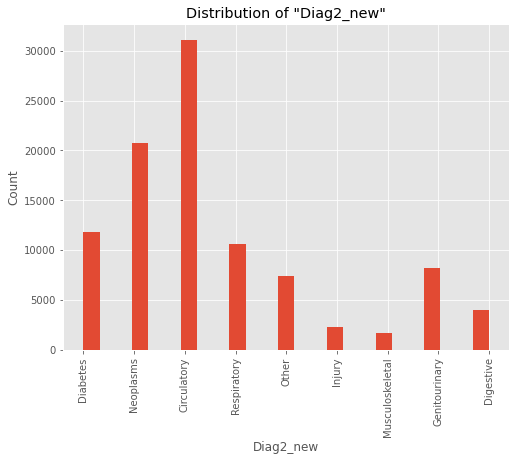

In [551]:
plt.figure(figsize=(8,6))
plt.hist(diabetes_df_reduced_4["Diag2_new"],bins=25)
plt.xticks(rotation=90)
plt.title('Distribution of "Diag2_new"')
plt.xlabel("Diag2_new")
plt.ylabel("Count")
plt.show()

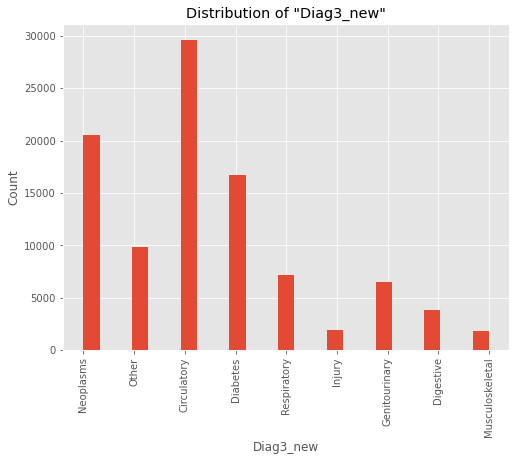

In [552]:
plt.figure(figsize=(8,6))
plt.hist(diabetes_df_reduced_4["Diag3_new"],bins=25)
plt.xticks(rotation=90)
plt.title('Distribution of "Diag3_new"')
plt.xlabel("Diag3_new")
plt.ylabel("Count")
plt.show()

In [553]:
diabetes_df_reduced_5 = diabetes_df_reduced_4.drop(columns=['diag_1', 'diag_2', 'diag_3'])

In [554]:
diabetes_df_reduced_5.shape

(98053, 46)

#### Converting target variable into 2 values: readmitted or not within 30 days

In this study, the target variable:'Readmitted' has 3 values-
* 'No'=No readmission
* '>30'=Readmission done after 30 days
* '<30'=Readmission done within 30 days

The goal is to predict the readmission done within 30 days. With this in mind, we will convert the values in target variable using one-hot encoding and assigning-
* 'No' and '>30'=0
* '<30'=1


In [555]:
target_var ={'NO':0,
             '>30':0,
             '<30':1}

diabetes_df_reduced_5['readmitted_new'] = diabetes_df_reduced_5['readmitted'].map(target_var)


In [556]:
diabetes_df_reduced_6= diabetes_df_reduced_5.drop(columns=['readmitted'])
diabetes_df_reduced_6.shape

(98053, 46)

'diabetes_df_reduced_6' is the data set with no missing values. This data set will be used to build a logistic regression model


In [557]:
diabetes_df_reduced_6.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,payer_code_new,age_new,medical_specialty_new,Diag1_new,Diag2_new,Diag3_new,readmitted_new
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Private,0-20,Pediatrics,Neoplasms,Diabetes,Neoplasms,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Private,20-40,InternalMedicine,Other,Diabetes,Other,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Private,20-40,InternalMedicine,Neoplasms,Diabetes,Circulatory,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Private,40-60,InternalMedicine,Neoplasms,Neoplasms,Diabetes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,Private,40-60,InternalMedicine,Circulatory,Circulatory,Diabetes,0


In [558]:
final_diabetic_data=diabetes_df_reduced_6
final_diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,payer_code_new,age_new,medical_specialty_new,Diag1_new,Diag2_new,Diag3_new,readmitted_new
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Private,0-20,Pediatrics,Neoplasms,Diabetes,Neoplasms,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Private,20-40,InternalMedicine,Other,Diabetes,Other,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Private,20-40,InternalMedicine,Neoplasms,Diabetes,Circulatory,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Private,40-60,InternalMedicine,Neoplasms,Neoplasms,Diabetes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,Private,40-60,InternalMedicine,Circulatory,Circulatory,Diabetes,0


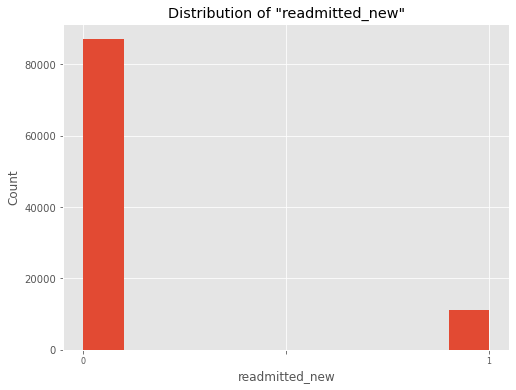

In [559]:
plt.figure(figsize=(8,6))
plt.hist(final_diabetic_data["readmitted_new"])
xtick = [0, 0.5, 1]
xtick_labels = ['0' , '', '1']
plt.xticks(xtick, xtick_labels, fontsize=8)
plt.title('Distribution of "readmitted_new"')
plt.xlabel("readmitted_new")
plt.ylabel("Count")
plt.show()

## Model Preparation

In [560]:
# Structure of final dataset
final_diabetic_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  object
 3   admission_type_id         98053 non-null  int64 
 4   discharge_disposition_id  98053 non-null  int64 
 5   admission_source_id       98053 non-null  int64 
 6   time_in_hospital          98053 non-null  int64 
 7   num_lab_procedures        98053 non-null  int64 
 8   num_procedures            98053 non-null  int64 
 9   num_medications           98053 non-null  int64 
 10  number_outpatient         98053 non-null  int64 
 11  number_emergency          98053 non-null  int64 
 12  number_inpatient          98053 non-null  int64 
 13  number_diagnoses          98053 non-null  int64 
 14  max_glu_serum        

In [561]:
#There are many character variables, we will One Hot Encode the data
diabetes_df_LR_ohe = pd.get_dummies(final_diabetic_data,drop_first=True)

In [562]:
diabetes_df_LR_ohe.shape

(98053, 125)

In [563]:
diabetes_df_LR_ohe.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 125 columns):
 #    Column                                        Dtype
---   ------                                        -----
 0    admission_type_id                             int64
 1    discharge_disposition_id                      int64
 2    admission_source_id                           int64
 3    time_in_hospital                              int64
 4    num_lab_procedures                            int64
 5    num_procedures                                int64
 6    num_medications                               int64
 7    number_outpatient                             int64
 8    number_emergency                              int64
 9    number_inpatient                              int64
 10   number_diagnoses                              int64
 11   readmitted_new                                int64
 12   race_Asian                                    uint8
 13   race_Caucasia

In [564]:
diabetes_df_LR_ohe.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_new,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,payer_code_new_Private,payer_code_new_Self_Pay,age_new_20-40,age_new_40-60,age_new_60-70,age_new_>70,medical_specialty_new_Emergency/Trauma,medical_specialty_new_Family/GeneralPractice,medical_specialty_new_Hematology/Oncology,medical_specialty_new_Hospital Staff,medical_specialty_new_InternalMedicine,medical_specialty_new_Neurologist,medical_specialty_new_Obstet/Gynec,medical_specialty_new_Orthopedics,medical_specialty_new_Others,medical_specialty_new_Pediatrics,medical_specialty_new_Psychology,medical_specialty_new_Radiologist,medical_specialty_new_Surgery,Diag1_new_Diabetes,Diag1_new_Digestive,Diag1_new_Genitourinary,Diag1_new_Injury,Diag1_new_Musculoskeletal,Diag1_new_Neoplasms,Diag1_new_Other,Diag1_new_Respiratory,Diag2_new_Diabetes,Diag2_new_Digestive,Diag2_new_Genitourinary,Diag2_new_Injury,Diag2_new_Musculoskeletal,Diag2_new_Neoplasms,Diag2_new_Other,Diag2_new_Respiratory,Diag3_new_Diabetes,Diag3_new_Digestive,Diag3_new_Genitourinary,Diag3_new_Injury,Diag3_new_Musculoskeletal,Diag3_new_Neoplasms,Diag3_new_Other,Diag3_new_Respiratory
1,1,1,7,3,59,0,18,0,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,7,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,7,2,44,1,16,0,0,0,7,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,7,1,51,0,8,0,0,0,5,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5,2,1,2,3,31,6,16,0,0,0,9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [565]:
diabetes_df_LR_ohe.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_new,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,payer_code_new_Private,payer_code_new_Self_Pay,age_new_20-40,age_new_40-60,age_new_60-70,age_new_>70,medical_specialty_new_Emergency/Trauma,medical_specialty_new_Family/GeneralPractice,medical_specialty_new_Hematology/Oncology,medical_specialty_new_Hospital Staff,medical_specialty_new_InternalMedicine,medical_specialty_new_Neurologist,medical_specialty_new_Obstet/Gynec,medical_specialty_new_Orthopedics,medical_specialty_new_Others,medical_specialty_new_Pediatrics,medical_specialty_new_Psychology,medical_specialty_new_Radiologist,medical_specialty_new_Surgery,Diag1_new_Diabetes,Diag1_new_Digestive,Diag1_new_Genitourinary,Diag1_new_Injury,Diag1_new_Musculoskeletal,Diag1_new_Neoplasms,Diag1_new_Other,Diag1_new_Respiratory,Diag2_new_Diabetes,Diag2_new_Digestive,Diag2_new_Genitourinary,Diag2_new_Injury,Diag2_new_Musculoskeletal,Diag2_new_Neoplasms,Diag2_new_Other,Diag2_new_Respiratory,Diag3_new_Diabetes,Diag3_new_Digestive,Diag3_new_Genitourinary,Diag3_new_Injury,Diag3_new_Musculoskeletal,Diag3_new_Neoplasms,Diag3_new_Other,Diag3_new_Respiratory
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.00000,98053.000000,98053.000000,98053.000000,98053.000000,98053.00000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053

In [566]:
y= diabetes_df_LR_ohe['readmitted_new'].values
X = diabetes_df_LR_ohe.drop(columns=['readmitted_new']).values

In [567]:
print(y.shape)
print(X.shape)

(98053,)
(98053, 124)


In [568]:
# Scale the data
scl = StandardScaler()
X_scaled = scl.fit_transform(X)

In [569]:
print(X_scaled)

[[-0.71 -0.52  0.3  ...  1.94 -0.33 -0.28]
 [-0.71 -0.52  0.3  ... -0.51  2.99 -0.28]
 [-0.71 -0.52  0.3  ... -0.51 -0.33 -0.28]
 ...
 [-0.71 -0.52  0.3  ...  1.94 -0.33 -0.28]
 [-0.02 -0.14  0.3  ... -0.51 -0.33 -0.28]
 [-0.71 -0.52  0.3  ... -0.51 -0.33 -0.28]]


In [570]:
np.unique(y)

array([0, 1])

In [571]:
#create cv object
from sklearn.model_selection import cross_val_score
cv = StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [572]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegressionCV
LR1 = LogisticRegressionCV(cv=cv)

In [573]:
LR1.fit(X_scaled,y)

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LogisticRegressionCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True))

In [574]:
LR1.coef_

array([[-1.25e-02,  6.86e-02, -6.17e-03,  3.48e-02,  1.17e-02, -2.11e-02,
         3.39e-02,  7.98e-03,  4.24e-02,  2.00e-01,  4.45e-02, -1.54e-04,
         3.15e-03, -2.06e-03, -7.49e-03,  1.35e-03, -1.58e-03, -1.01e-02,
         6.27e-03,  5.24e-04, -1.22e-03, -1.63e-02,  2.54e-03,  8.85e-03,
         7.06e-03, -5.22e-03,  7.15e-03, -9.31e-03,  1.00e-03, -8.53e-03,
         1.83e-02, -9.38e-03,  1.82e-02, -1.77e-02, -1.20e-02, -4.33e-03,
         4.34e-03,  8.74e-03, -8.89e-04,  2.28e-03, -6.06e-03,  5.62e-03,
        -4.22e-03, -4.90e-03,  7.66e-03, -9.43e-03,  1.62e-04, -2.37e-03,
        -6.09e-03, -1.15e-03,  6.16e-03,  5.10e-03, -1.21e-03, -1.70e-03,
        -5.54e-03,  5.59e-03, -7.16e-03,  1.69e-03,  6.58e-03, -4.50e-03,
        -2.03e-03,  4.78e-03, -6.65e-03,  5.03e-03, -1.10e-03, -4.74e-03,
        -3.20e-03, -3.51e-03, -2.09e-03, -2.23e-03, -2.62e-02, -9.73e-03,
         5.94e-03,  1.46e-03, -7.02e-04, -4.24e-03, -2.13e-03, -2.27e-03,
        -1.64e-03, -1.35e-02,  3.38e-0

In [575]:
LR1.scores_

{1: array([[0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89]])}

In [576]:
LR1.cv

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [577]:
score = LR1.scores_
type(score)
score

{1: array([[0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89]])}

In [578]:
LR1.score(X_scaled, y)

0.8871630648730788

In [579]:
ds = diabetes_df_LR_ohe.drop(columns=['readmitted_new'])

In [580]:
weights = LR1.coef_
weights
feature_names = ds.columns
len(feature_names)
feature_names
lregcv_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 
                               'weights':weights.ravel()
                               , 'absolute_weights': np.abs(weights.ravel())
                              })
lregcv_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

In [581]:
lreg_ft_imp_df

,feature_names,weights,absolute_weights
27,max_glu_serum_None,-0.287387,0.287387
9,number_inpatient,0.261558,0.261558
64,miglitol_No,-0.249627,0.249627
41,chlorpropamide_No,-0.241473,0.241473
70,insulin_No,-0.237301,0.237301
38,nateglinide_No,-0.235443,0.235443
107,Diag1_new_Respiratory,-0.224426,0.224426
61,acarbose_No,-0.222526,0.222526
35,repaglinide_No,-0.220447,0.220447
73,glyburide-metformin_No,-0.216592,0.216592


In [582]:
lregcv_ft_imp_df

,feature_names,weights,absolute_weights
9,number_inpatient,0.200267,0.200267
1,discharge_disposition_id,0.068599,0.068599
10,number_diagnoses,0.044515,0.044515
8,number_emergency,0.042441,0.042441
3,time_in_hospital,0.034791,0.034791
6,num_medications,0.033855,0.033855
80,diabetesMed_Yes,0.033850,0.033850
107,Diag1_new_Respiratory,-0.031959,0.031959
89,medical_specialty_new_Hematology/Oncology,0.031271,0.031271
70,insulin_No,-0.026247,0.026247


In [583]:
lregcv_ft_imp_df.shape

(124, 3)

In [584]:
lregcv_ft_imp_df_2 = lregcv_ft_imp_df[np.abs(lregcv_ft_imp_df['weights'])!= 0]
lregcv_ft_imp_df_2.shape

(124, 3)

In [585]:
top_25 = lregcv_ft_imp_df_2.head(25)
top_25

,feature_names,weights,absolute_weights
9,number_inpatient,0.200267,0.200267
1,discharge_disposition_id,0.068599,0.068599
10,number_diagnoses,0.044515,0.044515
8,number_emergency,0.042441,0.042441
3,time_in_hospital,0.034791,0.034791
6,num_medications,0.033855,0.033855
80,diabetesMed_Yes,0.033850,0.033850
107,Diag1_new_Respiratory,-0.031959,0.031959
89,medical_specialty_new_Hematology/Oncology,0.031271,0.031271
70,insulin_No,-0.026247,0.026247


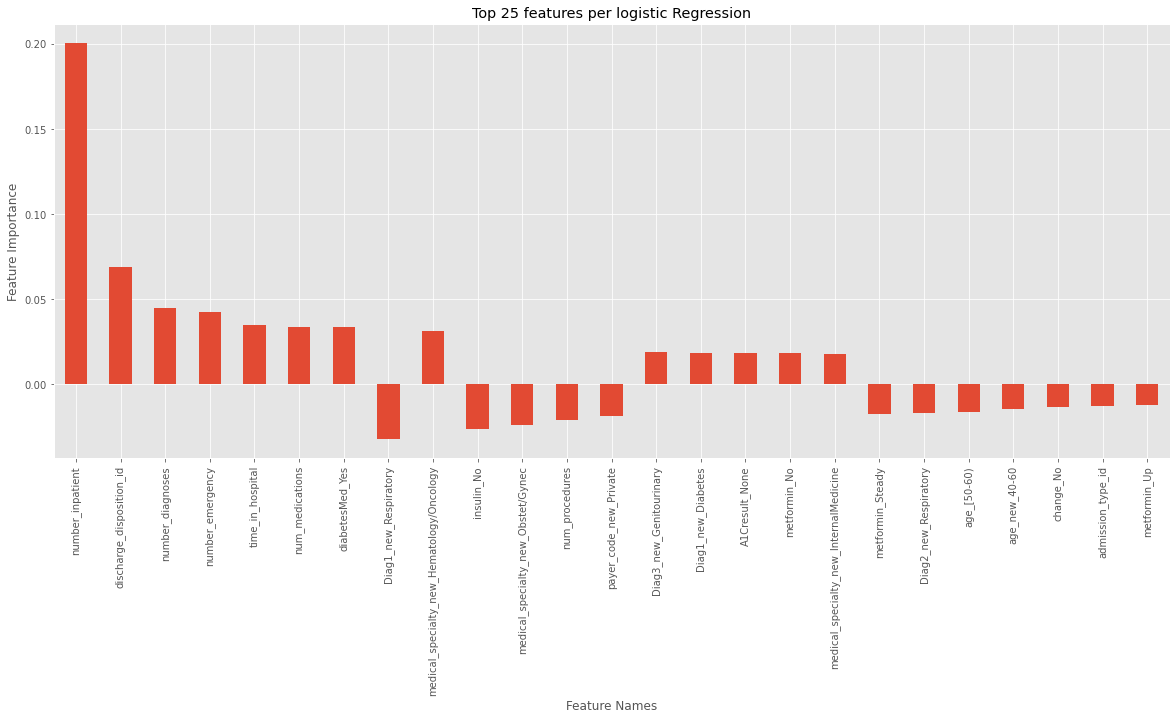

In [586]:
import matplotlib.pyplot as plt
%matplotlib inline
#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')
wt_plt_df = top_25
weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))
ax.set_title("Top 25 features per logistic Regression")
ax.set_ylabel("Feature Importance")
ax.set_xlabel("Feature Names")
plt.show()

In [587]:
# feature importance of all columns
lreg_ft_imp_df_2

,feature_names,weights,absolute_weights
27,max_glu_serum_None,-0.287387,0.287387
9,number_inpatient,0.261558,0.261558
64,miglitol_No,-0.249627,0.249627
41,chlorpropamide_No,-0.241473,0.241473
70,insulin_No,-0.237301,0.237301
38,nateglinide_No,-0.235443,0.235443
107,Diag1_new_Respiratory,-0.224426,0.224426
61,acarbose_No,-0.222526,0.222526
35,repaglinide_No,-0.220447,0.220447
73,glyburide-metformin_No,-0.216592,0.216592


## Model Building and Evaluation

In [588]:
# 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73539, 124)
(24514, 124)
(73539,)
(24514,)


In [589]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [590]:
print(y_test.shape)
print(y_pred.shape)

(24514,)
(24514,)


In [591]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,21704,43,21747
1,2727,40,2767
All,24431,83,24514


Text(0.5, 257.44, 'Predicted label')

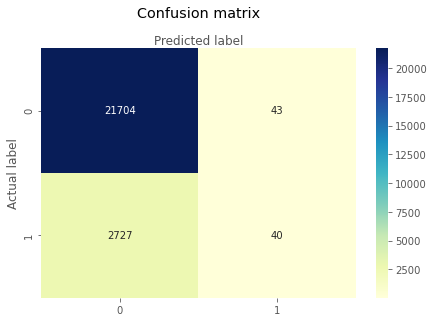

In [592]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

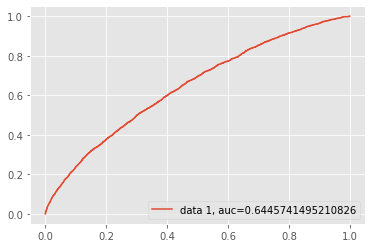

In [593]:
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [594]:
print(y_test.shape)
print(y_pred.shape)

(24514,)
(24514,)


In [595]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8870033450273314
Precision: 0.4819277108433735
Recall: 0.014456089627755691


In [596]:
weights = logreg.coef_
weights
feature_names = ds.columns
len(feature_names)
feature_names
lreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 
                               'weights':weights.ravel()
                               , 'absolute_weights': np.abs(weights.ravel())
                              })
lreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

In [597]:
lreg_ft_imp_df

,feature_names,weights,absolute_weights
27,max_glu_serum_None,-0.287387,0.287387
9,number_inpatient,0.261558,0.261558
64,miglitol_No,-0.249627,0.249627
41,chlorpropamide_No,-0.241473,0.241473
70,insulin_No,-0.237301,0.237301
38,nateglinide_No,-0.235443,0.235443
107,Diag1_new_Respiratory,-0.224426,0.224426
61,acarbose_No,-0.222526,0.222526
35,repaglinide_No,-0.220447,0.220447
73,glyburide-metformin_No,-0.216592,0.216592


In [598]:
import matplotlib.pyplot as plt
%matplotlib inline
#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
lreg_ft_imp_df_2 = lreg_ft_imp_df[np.abs(lreg_ft_imp_df['weights'])!= 0]
lreg_ft_imp_df_2.shape
top_25 = lreg_ft_imp_df_2.head(25)
top_25


,feature_names,weights,absolute_weights
27,max_glu_serum_None,-0.287387,0.287387
9,number_inpatient,0.261558,0.261558
64,miglitol_No,-0.249627,0.249627
41,chlorpropamide_No,-0.241473,0.241473
70,insulin_No,-0.237301,0.237301
38,nateglinide_No,-0.235443,0.235443
107,Diag1_new_Respiratory,-0.224426,0.224426
61,acarbose_No,-0.222526,0.222526
35,repaglinide_No,-0.220447,0.220447
73,glyburide-metformin_No,-0.216592,0.216592


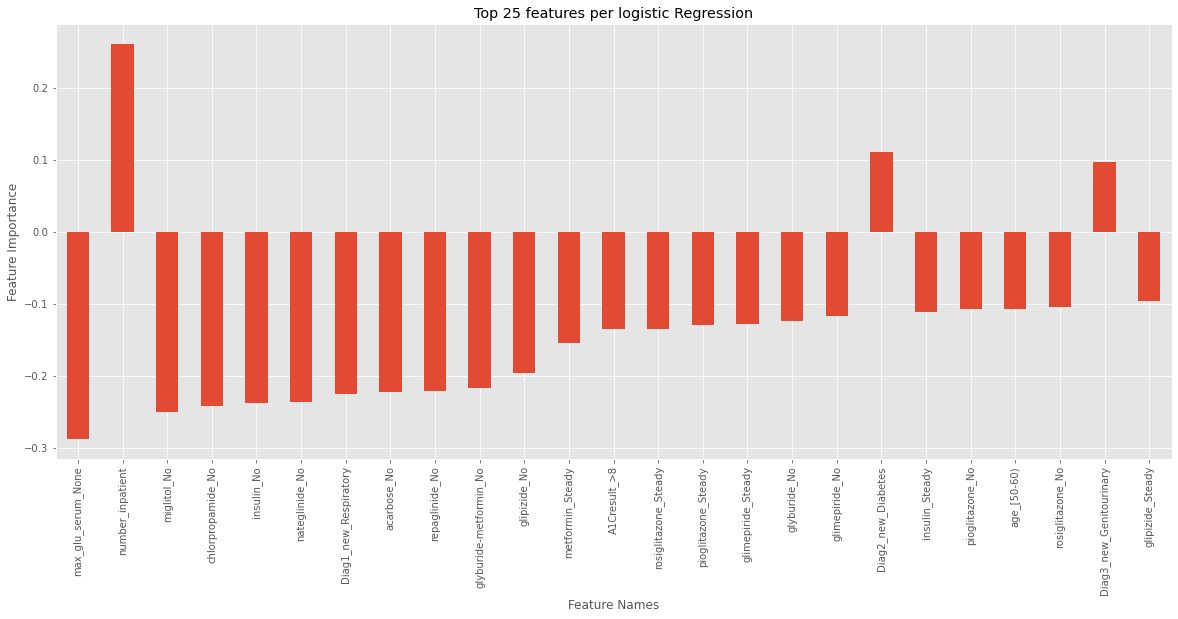

In [599]:
plt.style.use('ggplot')
wt_plt_df = top_25
weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))
ax.set_title("Top 25 features per logistic Regression")
ax.set_ylabel("Feature Importance")
ax.set_xlabel("Feature Names")
plt.show()

## Model Interpretability and Explanation

## Case Conclusion

###### What are we proposing to our audience and why?
Our primary takeaway is that in general patients who spend more time in hospitals are more prone to being readmitted. The readmission rate is high for the patients who have been in the hospital last year. In addition to this, number of prescriptions is also a strong indicator of being readmitted to the hospital.
###### How should they view our results and what to consider moving forward?
We believe that these results are reasonable and intuitive given the data in the above analysis, we believe that the medical community should keep a close eye on patients that often visit the hospital for both caregiving and financial reasons.
